# Classification of the Breast Cancer Dataset Using a DNF-SOM

## Data Loading and Preparation

First, we load and prepare the breast cancer dataset.

In [1]:
# Libraries.
import os
import sys

# Machine Learning Utilities.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Move to the models' directory.
sys.path.append(os.path.abspath("../Models"))

# Load the DNF-SOM models.
from DNFSOMClassifier1D import *
from DNFSOMClassifier2D import *

def load_process_breast_cancer(seed = 42):
    """
    Loads and processes the breast cancer dataset.
    """
    # Load the data.
    breast_cancer = load_breast_cancer()
    X, y = breast_cancer.data, breast_cancer.target
    labels = breast_cancer.target_names
    # Create training and testing sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size = 0.2,
        stratify = y,
        random_state = seed
    )
    # Normalise attributes.
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Apply SMOTE to balance class percentages.
    smote = SMOTE(random_state = seed)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test, labels

X_train, X_test, y_train, y_test, labels = load_process_breast_cancer()

## Demonstration: 1-Dimensional DNF-SOM Classifier

With the data prepared, we proceed to train a 1-D DNF-SOM on the training set.
Once training is complete, we visualise the learned codebook, evaluate and report the classification accuracy, and demonstrate how predictions are made using this framework.


Accuracy = 89.47%

Pred = malignant
Real = malignant


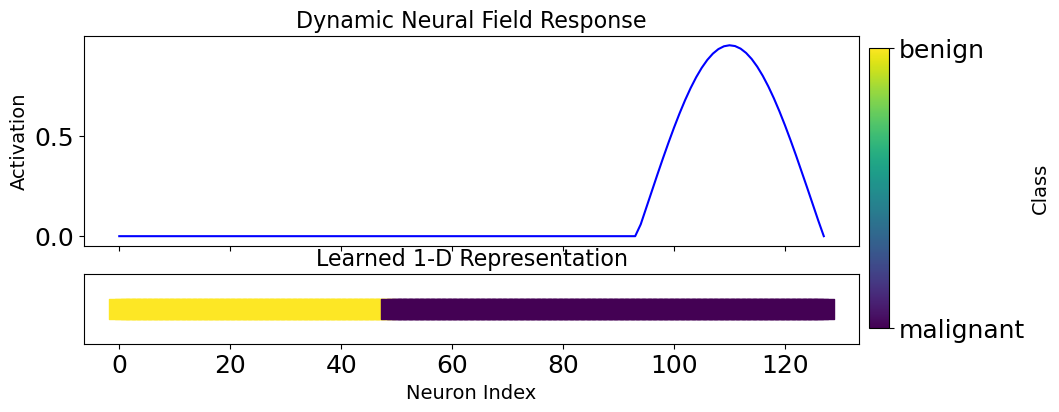

In [2]:
# Instantiate a 1-D DNF-SOM with 'n_units' neurons.
som_1d = DNFSOMClassifier1D(n_units = 128, seed = 2020)

# Fit the model on the training data.
som_1d.fit(X_train, y_train, epochs = 5000, verbose = -1)

# Visualise neural activation.
# som_1d.display_activity();
# Visualise the codebook.
# som_1d.display_classification(labels = labels);

# Make predictions.
y_pred = som_1d.predict(X_test)
print(f"\nAccuracy = {(100.0 * accuracy_score(y_test, y_pred)):.2f}%\n")

# Visualise a prediction.
som_1d.display_prediction(X_test, y_test, 0, labels);

# Demonstration: 2-Dimensional DNF-SOM Classifier

Finally, we repeat the process using a 2-Dimensional DNF-SOM Classifier, applying the same training, evaluation, and visualization steps as before.


Accuracy = 95.61%

Pred = malignant
Real = malignant


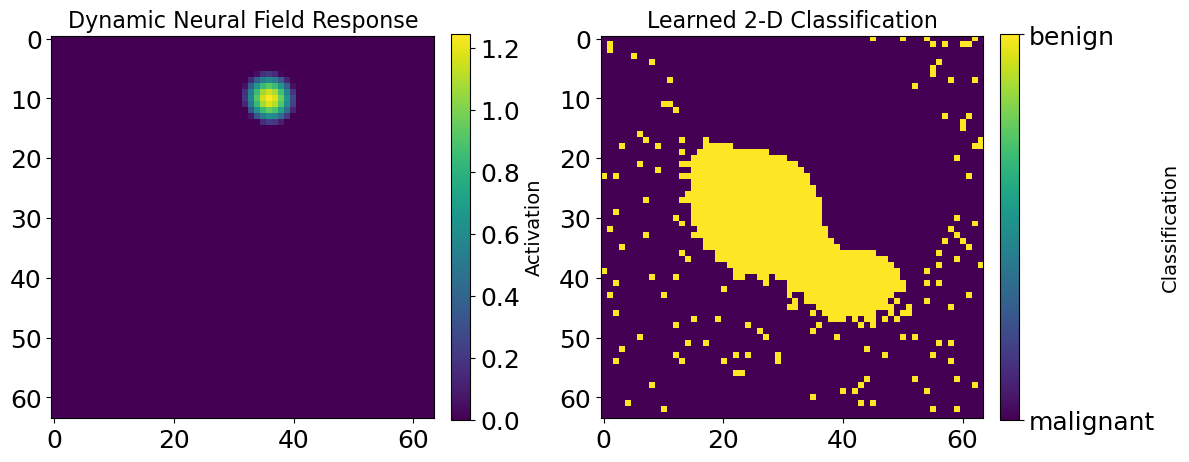

In [3]:
# Instantiate a 2-D DNF-SOM with 'n_units' neurons.
som_2d = DNFSOMClassifier2D(n_units = 64, seed = 2020)

# Fit the model on the training data.
som_2d.fit(X_train, y_train, epochs = 5000, verbose = -1)

# Visualise neural activation.
# som_2d.display_activity();
# Visualise the codebook.
# som_2d.display_classification(labels = labels);

# Make predictions.
y_pred = som_2d.predict(X_test)
print(f"\nAccuracy = {(100.0 * accuracy_score(y_test, y_pred)):.2f}%\n")

# Visualise a prediction.
som_2d.display_prediction(X_test, y_test, idx = 0, labels = labels);